In [1]:
import numpy as np
import scipy.stats as spst

import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as spsp

import json
import re
from pandas.io.json import json_normalize

import scipy.optimize as spopt

# Import MD data of 27 july 2023

In [2]:
#Import file with data scraper from AD
jsonFile = 'Data27July2023OrbitCorrectionVTuneChanged.history'
# convert json file to pandas
# read scraper data from JSON
scraperData = []
with open(jsonFile) as infile:
    lines = infile.readlines()
    for i, line in enumerate(lines):
        try:
            scraperData.append(json.loads(line))
        except:
            print('something wrong with line {}'.format(i))

scraperDataPD27july2023 = json_normalize(scraperData, max_level=2)

/tmp/ipykernel_1150/1271713215.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  scraperDataPD27july2023 = json_normalize(scraperData, max_level=2)


In [3]:
df = scraperDataPD27july2023

# Plot int-ext and top-bot without changing properties of scintillator and scalar

In [4]:
df_H = df[ (df["scraperDirection"] == "Int") | (df["scraperDirection"] == "Ext") ]
df_V = df[ (df["scraperDirection"] == "Top") | (df["scraperDirection"] == "Bot") ]

In [5]:
df_H

,dataScraperOriginTime,dataUser,dataCycle,dataResult,particule,momentum,originUtcTime,startScraperDelay,startTiming,betaHorizontal,...,det2.preferredMask,det2.butterworthCutOff,det2.xms,det2.yval,det3.device,det3.names,det3.preferredMask,det3.butterworthCutOff,det3.xms,det3.yval
1,2023/07/27 11:35:16.519,ADE.USER.ADE,_NON_MULTIPLEXED_AD_2023,BXSCINT_2010[0]:25.904735101671957 BXSCINT_201...,pbar,3573.763675,1690450516518000000,29000.0,DX.SGS-CT,4.975,...,1,0.0,[0.0],"[[0.0], [0.0]]",BXSCAL_2000,[BXSCAL_2000],1,0.0,"[29000.0, 29004.514048, 29009.028096, 29013.53...","[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
3,2023/07/27 11:39:21.318,ADE.USER.ADE,_NON_MULTIPLEXED_AD_2023,BXSCINT_2010[0]:26.279731881731045 BXSCINT_201...,pbar,3573.763675,1690450761318000000,29000.0,DX.SGS-CT,4.975,...,1,0.0,[0.0],"[[0.0], [0.0]]",BXSCAL_2000,[BXSCAL_2000],1,0.0,"[29000.0, 29004.513024, 29009.026048, 29013.53...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
4,2023/07/27 11:41:23.720,ADE.USER.ADE,_NON_MULTIPLEXED_AD_2023,BXSCINT_2010[0]:26.904747700976024 BXSCINT_201...,pbar,3573.525843,1690450883718000000,29000.0,DX.SGS-CT,4.975,...,1,0.0,[0.0],"[[0.0], [0.0]]",BXSCAL_2000,[BXSCAL_2000],1,0.0,"[29000.0, 29004.512, 29009.024, 29013.536, 290...","[[0.0, 0.0, 2.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0,..."
5,2023/07/27 11:46:16.610,ADE.USER.ADE,_NON_MULTIPLEXED_AD_2023,BXSCINT_2010[0]:26.030081899070495 BXSCINT_201...,pbar,3574.239341,1690451169318000000,29000.0,DX.SGS-CT,4.975,...,1,0.0,[0.0],"[[0.0], [0.0]]",BXSCAL_2000,[BXSCAL_2000],1,0.0,"[29000.0, 29004.513024, 29009.026048, 29013.53...","[[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."


30.50685951999992
26.17469951999999
30.779939839999997
26.355000320000045


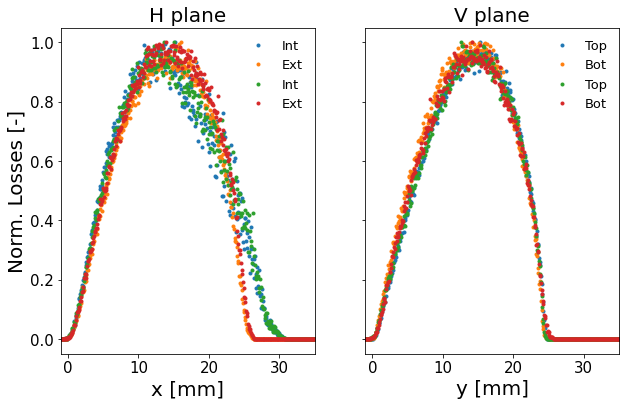

In [14]:
f, (axh, axv) = plt.subplots(1, 2, figsize = (10, 6), sharex = True, sharey = True)

for h in range(4):
    
    if 1:
        ydata_scalar = np.array(df_H["det3.yval"].iloc[h][0])[::-1]
        xdata_scalar = np.array(df_H["det3.xms"].iloc[h]) * 20e-3
    ind = np.where(ydata_scalar/max(ydata_scalar)>0.003)[0]
    
    axh.plot(xdata_scalar-xdata_scalar[ind[0]], ydata_scalar/max(ydata_scalar), ".", label = "%s"%df_H["scraperDirection"].iloc[h])
    print(xdata_scalar[ind[-1]]-xdata_scalar[ind[0]])

    if 1:
        ydata_scalar = np.array(df_V["det3.yval"].iloc[h][0])[::-1]
        xdata_scalar = np.array(df_V["det3.xms"].iloc[h]) * 20e-3
    ind = np.where(ydata_scalar/max(ydata_scalar)>0.003)[0]
    
    axv.plot(xdata_scalar-xdata_scalar[ind[0]], ydata_scalar/max(ydata_scalar), ".", label = "%s"%df_V["scraperDirection"].iloc[h]) 
axv.set_xlim([-1, 35])

axh.legend(frameon = False, prop = {"size":13})
axv.legend(frameon = False, prop = {"size":13})

axh.set_title("H plane", size = 20)
axv.set_title("V plane", size = 20)

axh.set_xlabel("x [mm]", size = 20)
axv.set_xlabel("y [mm]", size = 20)
axh.set_ylabel("Norm. Losses [-]", size = 20)

axh.tick_params(axis = "both", which = "major", labelsize = 15)
axv.tick_params(axis = "both", which = "major", labelsize = 15)

In [19]:
30.50685951999992 - 26.17469951999999

4.332159999999931

In [20]:
30.779939839999997 - 26.355000320000045

4.424939519999953

In [56]:
dpp = 3/100 #adimensional
disp = 4.7e-2 #meters

x_disp = disp*dpp*1e3 #to have it in mm
print(x_disp)

1.41


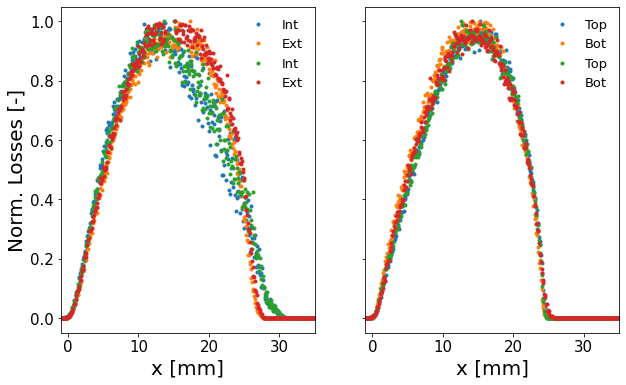

In [55]:
f, (axh, axv) = plt.subplots(1, 2, figsize = (10, 6), sharex = True, sharey = True)

for h in range(4):
    
    if df_H["scraperDirection"].iloc[h] == "Ext":
        ind_max = np.argmax(np.array(df_H["det3.yval"].iloc[h][0])[::-1])
        DispersiveOrbit = []
        DispersiveOrbit = np.concatenate((np.zeros(len(df_H["det3.xms"].iloc[h][:ind_max]))
            , np.ones(len(df_H["det3.xms"].iloc[h][ind_max:])) * disp * dpp * 1e3 ))
    else:
        DispersiveOrbit = np.zeros(len(df_H["det3.xms"].iloc[h]))
        
    xdata_scalar = np.array(df_H["det3.xms"].iloc[h]) * 20e-3
    ydata_scalar = np.array(df_H["det3.yval"].iloc[h][0])[::-1]
    ind = np.where(ydata_scalar/max(ydata_scalar)>0.003)[0]
    
    axh.plot(xdata_scalar-xdata_scalar[ind[0]]+DispersiveOrbit, ydata_scalar/max(ydata_scalar), ".", label = "%s"%df_H["scraperDirection"].iloc[h])

    if 1:
        ydata_scalar = np.array(df_V["det3.yval"].iloc[h][0])[::-1]
        xdata_scalar = np.array(df_V["det3.xms"].iloc[h]) * 20e-3
    ind = np.where(ydata_scalar/max(ydata_scalar)>0.003)[0]
    
    axv.plot(xdata_scalar-xdata_scalar[ind[0]], ydata_scalar/max(ydata_scalar), ".", label = "%s"%df_V["scraperDirection"].iloc[h]) 
axv.set_xlim([-1, 35])
axh.set_xlim([-1, 35])

axh.legend(frameon = False, prop = {"size":13})
axv.legend(frameon = False, prop = {"size":13})

axh.set_xlabel("x [mm]", size = 20)
axv.set_xlabel("x [mm]", size = 20)
axh.set_ylabel("Norm. Losses [-]", size = 20)

axh.tick_params(axis = "both", which = "major", labelsize = 15)
axv.tick_params(axis = "both", which = "major", labelsize = 15)